## Step1 :- Library Imports and Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

+ Data import and  Exploration

In [2]:
gp_df = pd.read_csv(r"C:\radha\GitHub\Gold-Price-Prediction\Gold_data_Excel.csv",parse_dates = ['date'])
gp_df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [3]:
gp_df.tail()

,date,price
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


In [4]:
gp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [5]:
gp_df[gp_df.duplicated()]

,date,price


In [6]:
len(gp_df) ## 365*6 - 10 + 2(2016 and 2020 being leap) = 2182

2182

## Setp 2 :- EDA for data using SMA

In [7]:
df = pd.read_csv(r"C:\radha\GitHub\Gold-Price-Prediction\Gold_data_Excel.csv",parse_dates = ['date'],index_col='date')
df.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [8]:
df.tail()

,price
date,
2021-12-17,4394.4
2021-12-18,4389.5
2021-12-19,4389.5
2021-12-20,4354.1
2021-12-21,4346.5


In [9]:
df.shape

(2182, 1)

In [10]:
print(f"The Gold prices are available for {df.index.year.max() - df.index.year.min()} years")

The Gold prices are available for 5 years


In [11]:
df.isnull().sum()

price    0
dtype: int64

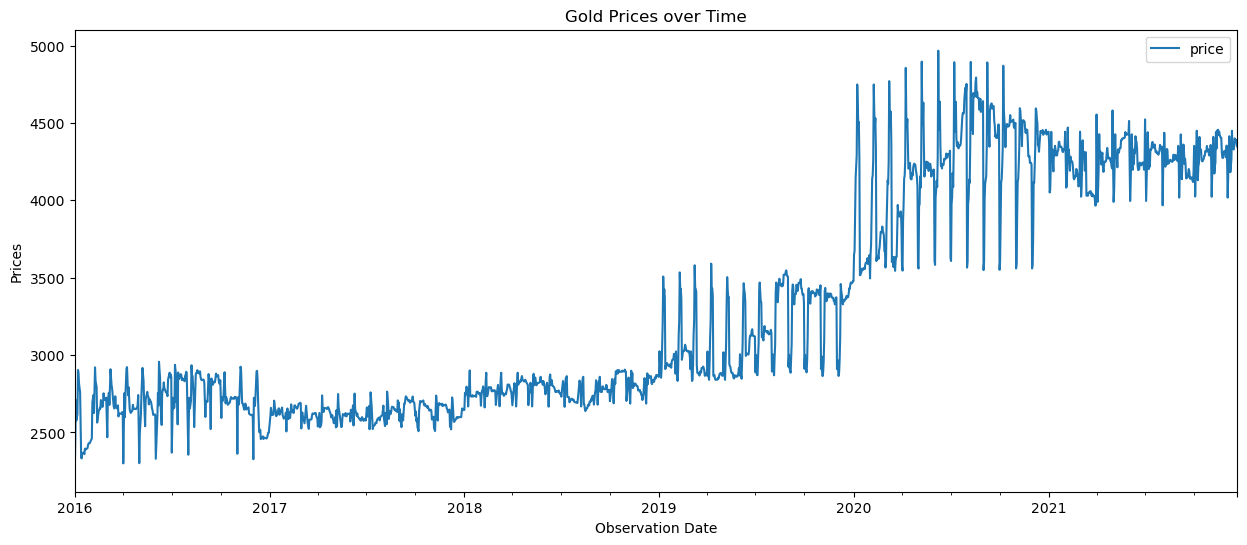

In [12]:
df.plot(figsize = (15,6))
plt.xlabel("Observation Date")
plt.ylabel("Prices")
plt.title("Gold Prices over Time")
plt.show()

#### Simple moving average

In [13]:
df1 = df.copy()
df1.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [14]:
df1['7day_rolling'] = df1.rolling(window=7,min_periods=1).mean()

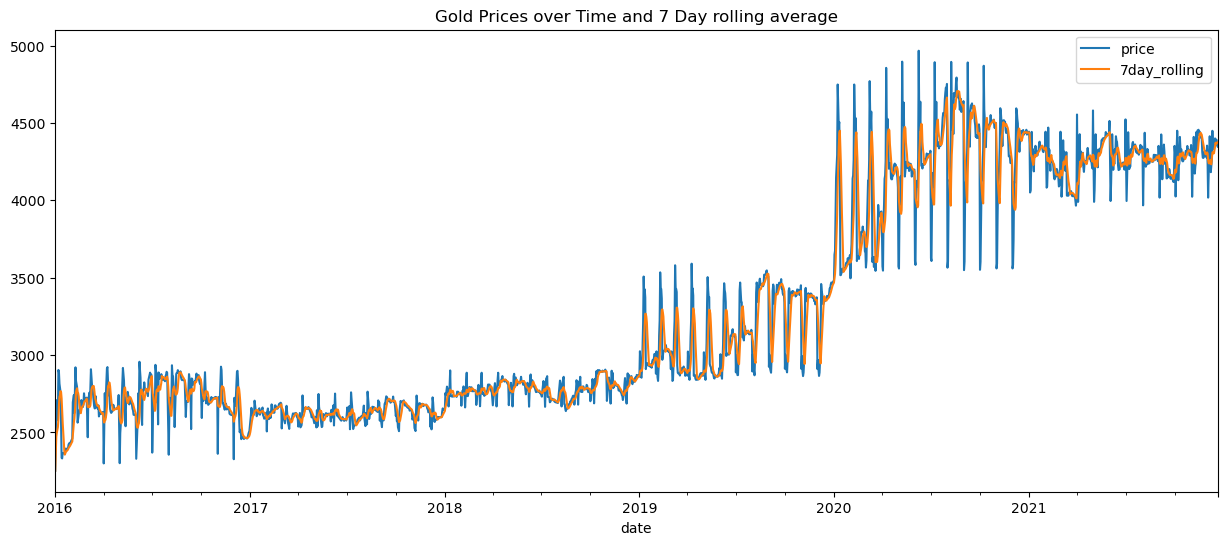

In [15]:
df1[['price','7day_rolling']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and 7 Day rolling average")
plt.legend()
plt.show()

In [16]:
df1['10day_rolling'] = df1['price'].rolling(window=10,min_periods=1).mean()

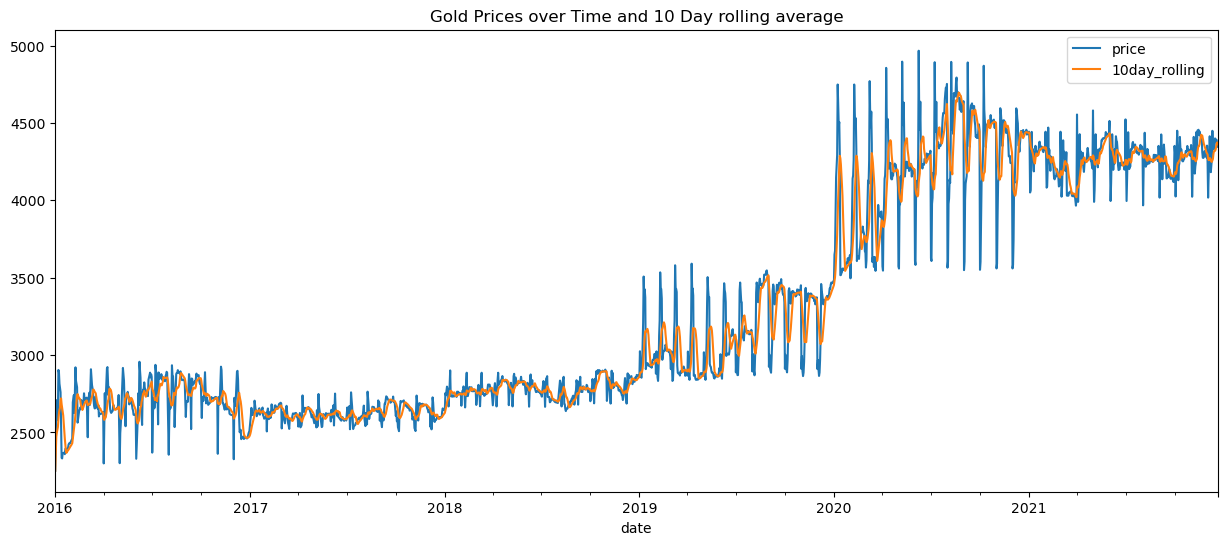

In [17]:
df1[['price','10day_rolling']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and 10 Day rolling average")
plt.legend()
plt.show()

In [18]:
df1['30day_rolling'] = df1['price'].rolling(window=30,min_periods=1).mean()

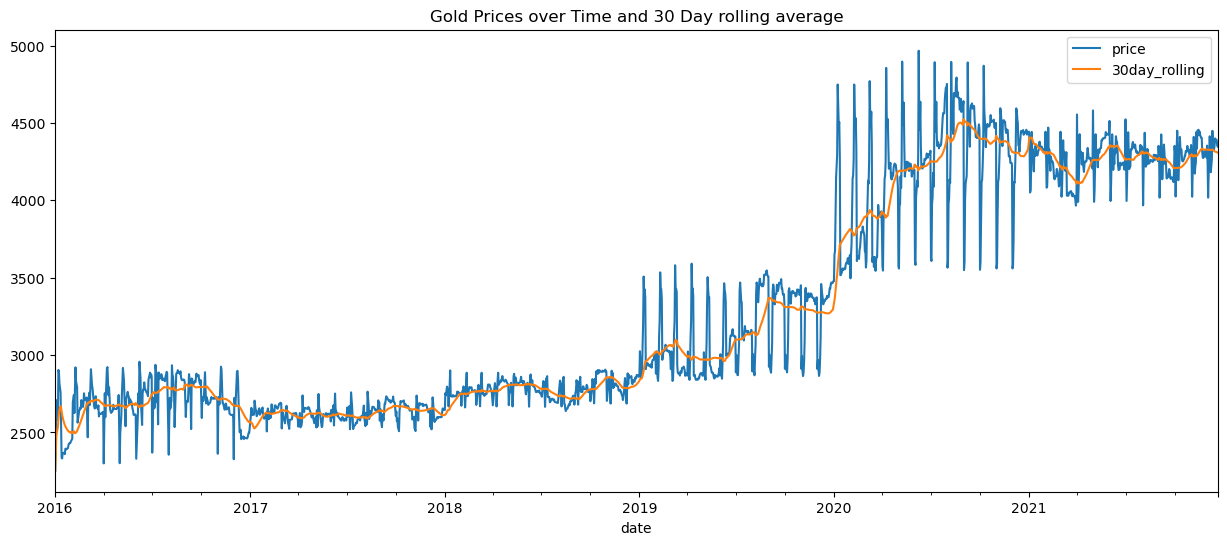

In [19]:
df1[['price','30day_rolling']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and 30 Day rolling average")
plt.legend()
plt.show()

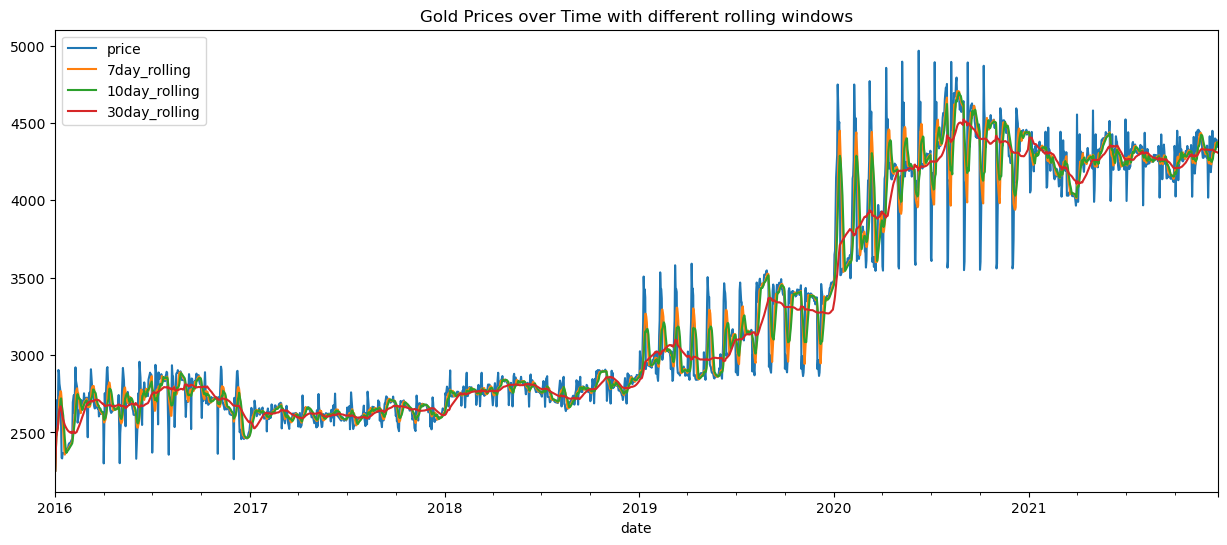

In [20]:
df1[['price','7day_rolling','10day_rolling','30day_rolling']].plot(figsize= (15,6))
plt.title("Gold Prices over Time with different rolling windows")
plt.legend()
plt.show()

### Expanding - Cummlative moving average

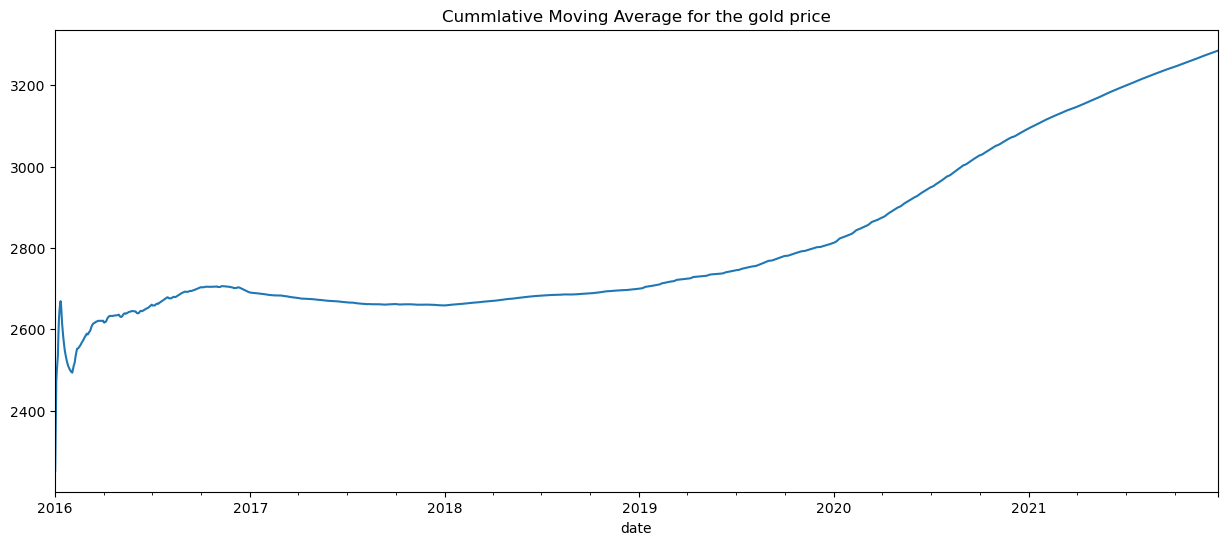

In [21]:
df1['price'].expanding().mean().plot(figsize= (15,6))
plt.title("Cummlative Moving Average for the gold price")
plt.show()

### EMA :- Exponential Moving Average

In [22]:
df1['EMA_0.1'] = df1['price'].ewm(alpha=0.1,adjust=False).mean()

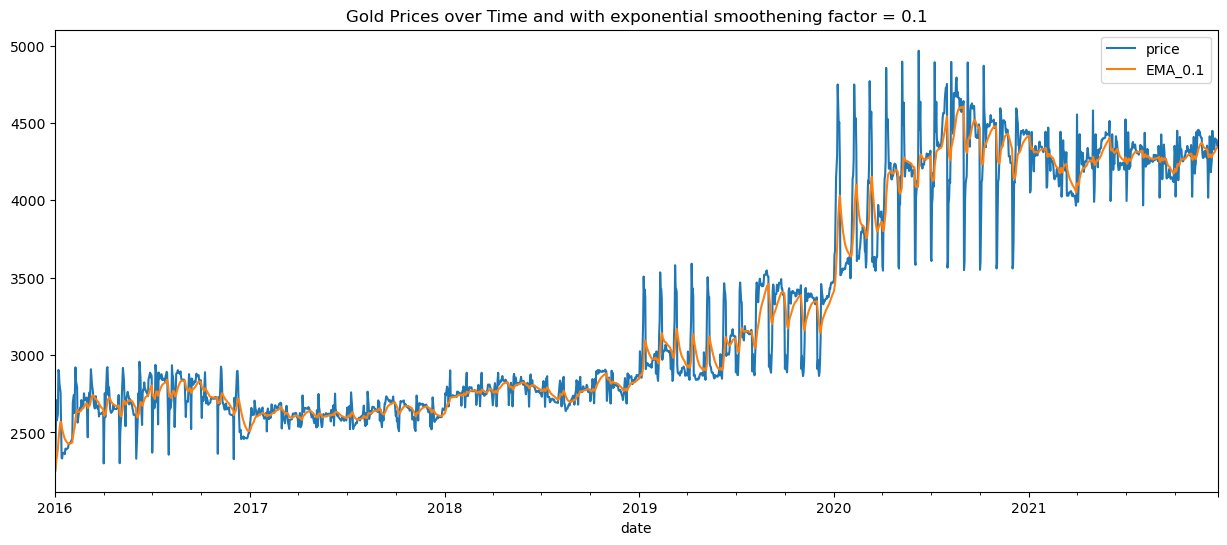

In [23]:
df1[['price','EMA_0.1']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and with exponential smoothening factor = 0.1")
plt.legend()
plt.show()

In [24]:
df1['EMA_0.3'] = df1['price'].ewm(alpha=0.3,adjust=False).mean()

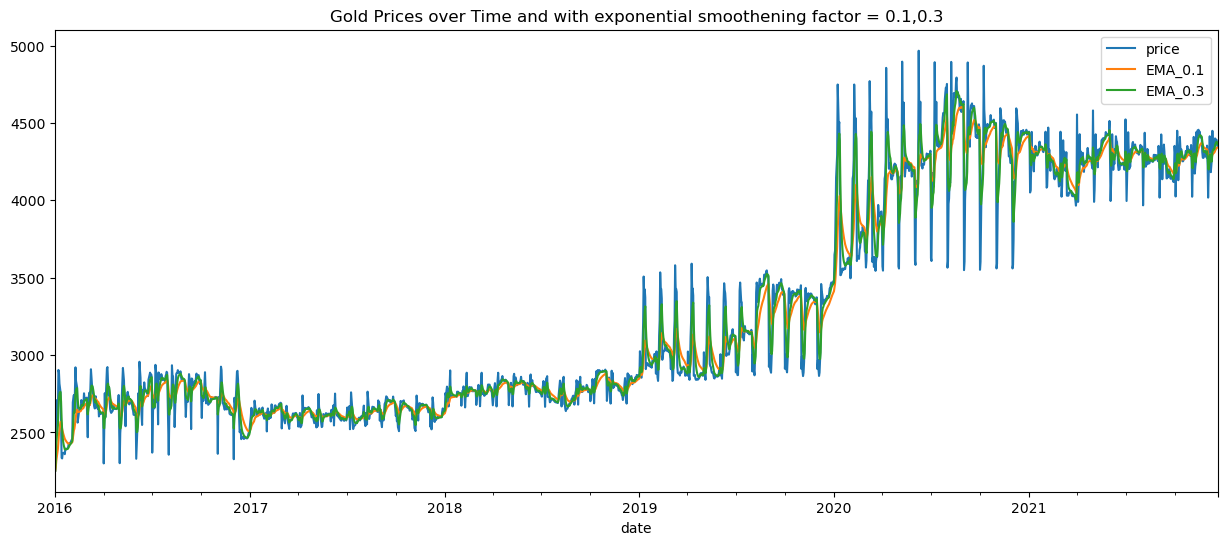

In [25]:
df1[['price','EMA_0.1','EMA_0.3']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and with exponential smoothening factor = 0.1,0.3")
plt.legend()
plt.show()

In [26]:
df1['EMA_0.5'] = df1['price'].ewm(alpha=0.5,adjust=False).mean()

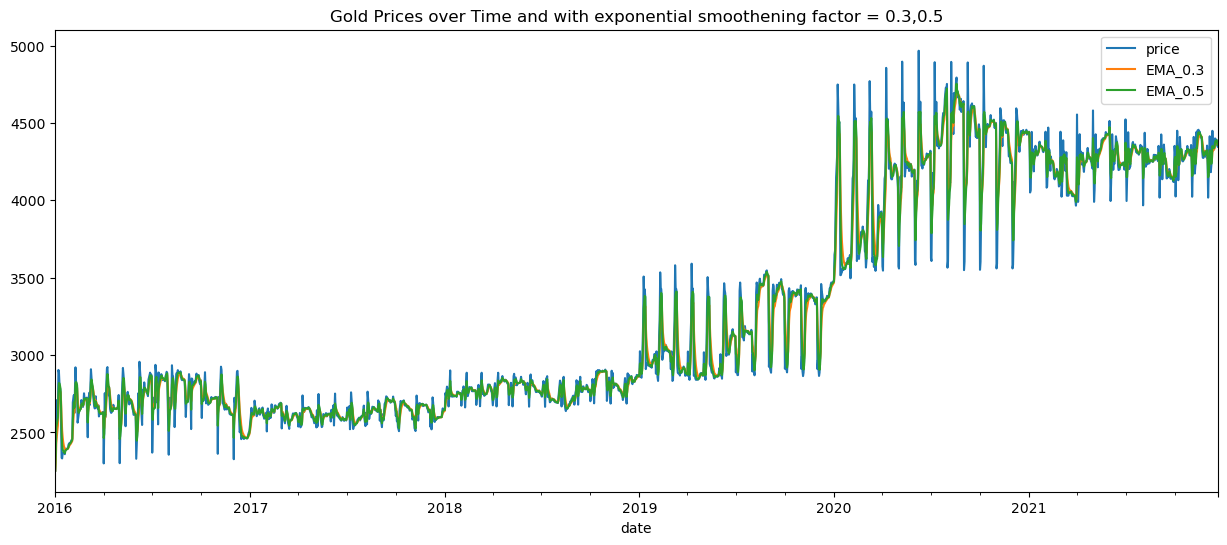

In [27]:
df1[['price','EMA_0.3','EMA_0.5']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and with exponential smoothening factor = 0.3,0.5")
plt.legend()
plt.show()

In [28]:
df1['EMA_0.7'] = df1['price'].ewm(alpha=0.7,adjust=False).mean()

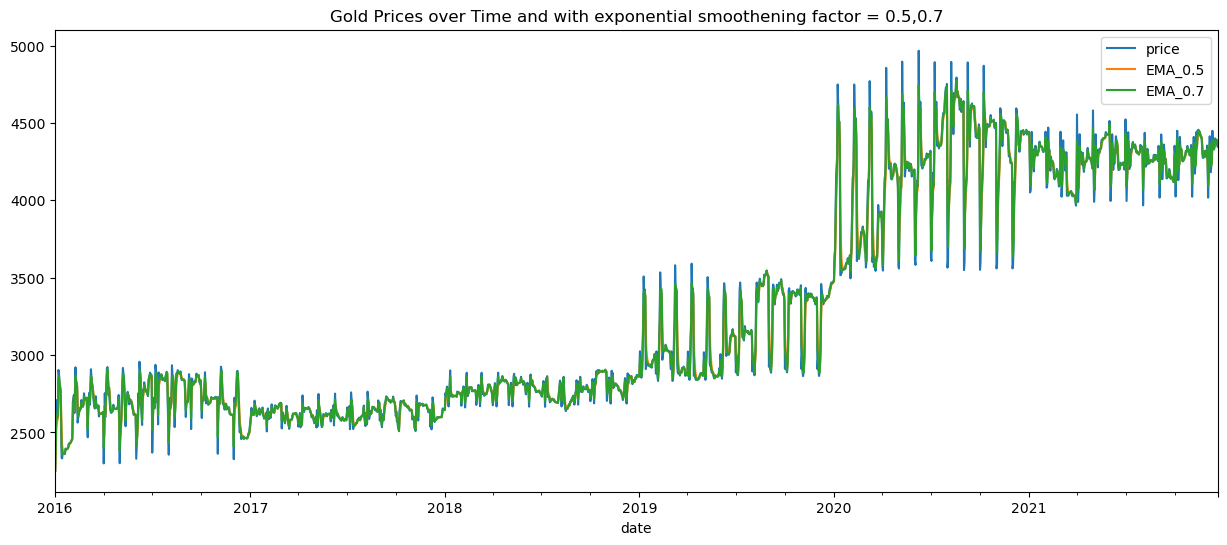

In [29]:
df1[['price','EMA_0.5','EMA_0.7']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and with exponential smoothening factor = 0.5,0.7")
plt.legend()
plt.show()

In [35]:
df1['EMA_0.9'] = df1['price'].ewm(alpha=0.9,adjust=False).mean()

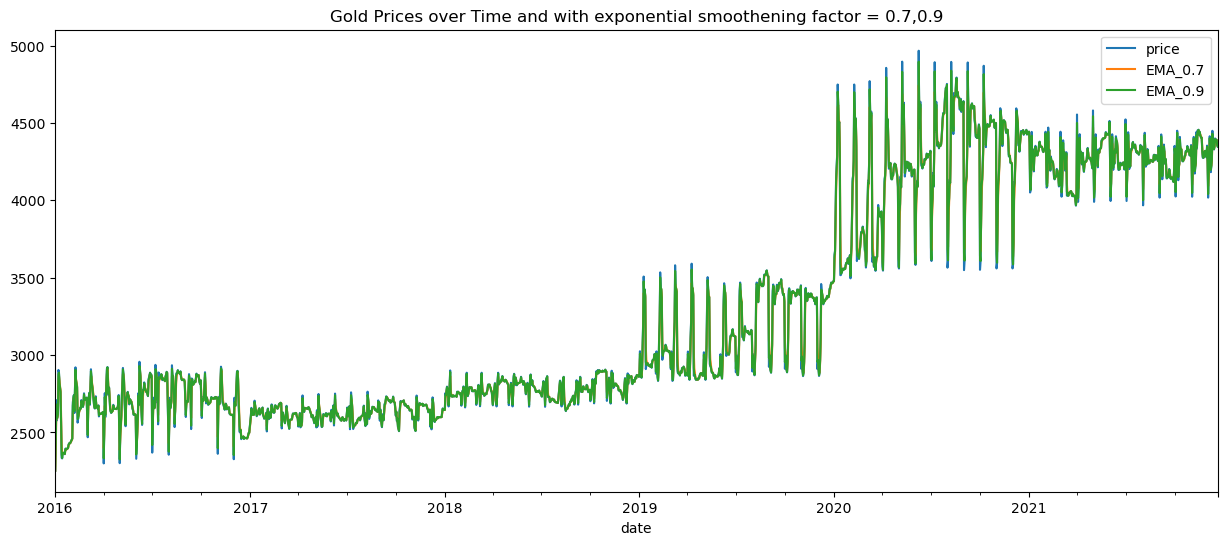

In [36]:
df1[['price','EMA_0.7','EMA_0.9']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and with exponential smoothening factor = 0.7,0.9")
plt.legend()
plt.show()

In [38]:
df1['EMA_1'] = df1['price'].ewm(alpha=1,adjust=False).mean()

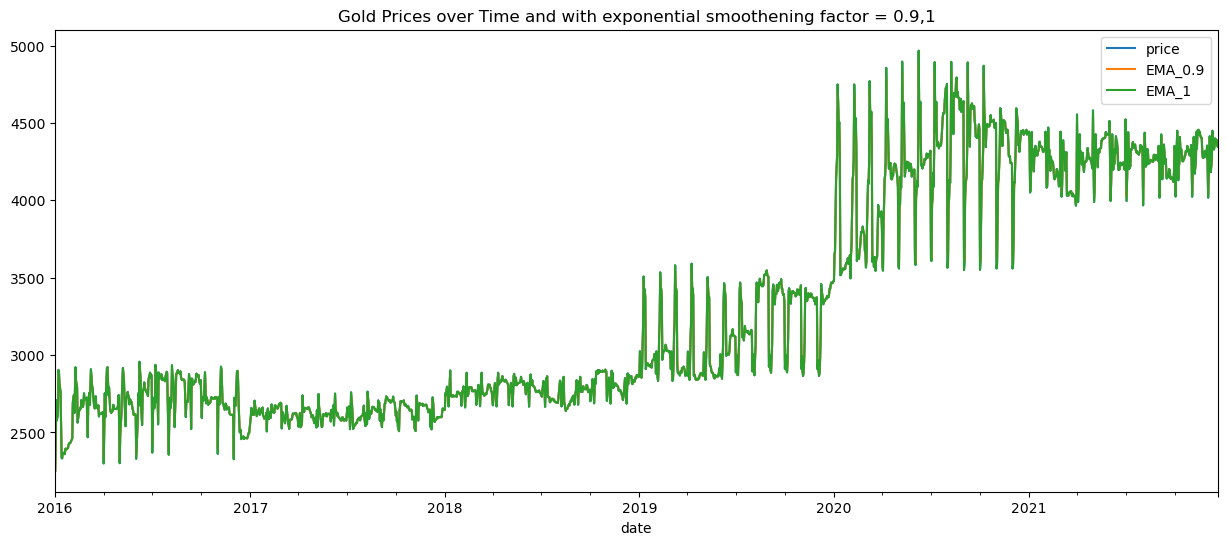

In [39]:
df1[['price','EMA_0.9','EMA_1']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and with exponential smoothening factor = 0.9,1")
plt.legend()
plt.show()

### Exponential weighted moving average

In [41]:
df1['EWMA_1'] = df1['price'].ewm(span=1).mean()

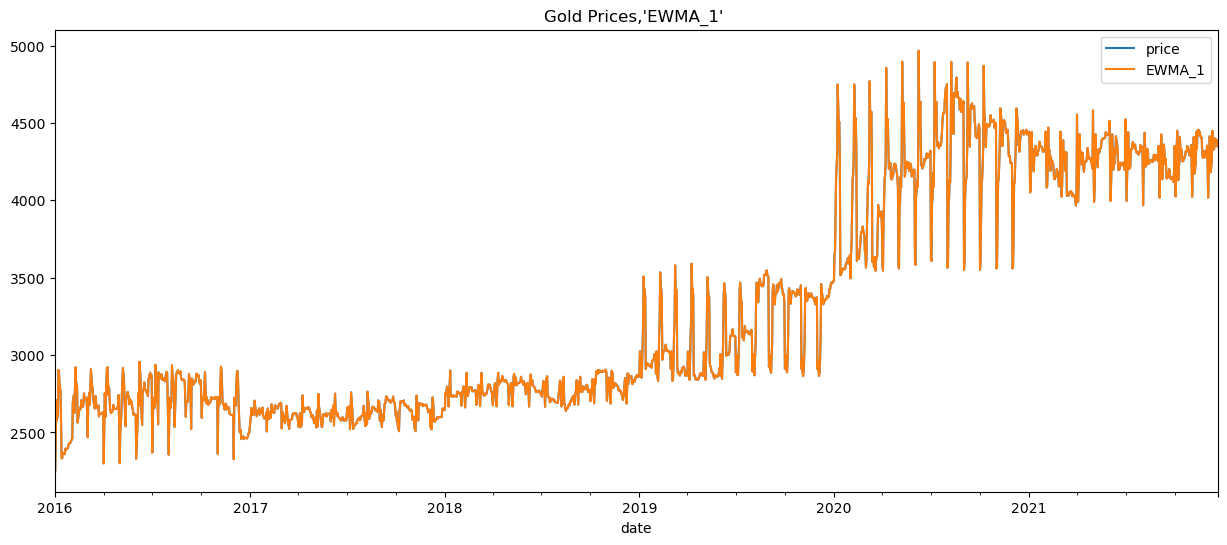

In [42]:
df1[['price','EWMA_1']].plot(figsize=(15,6))
plt.title("Gold Prices,'EWMA_1' ")
plt.legend()
plt.show()

In [ ]:
df.resample('M').mean().plot(figsize=(15,6))
plt.title(" Monthly variation of Mean Gold Price")
plt.show()

In [ ]:
df_copy  = df.resample('MS')

In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
df = STL(df).fit()
df.plot()
plt.show()

## Ploting The Data Series as a Heatmap per year to observe the Daily Gold Price Fluctuation

In [ ]:
import calplot
calplot.calplot(df['price'],edgecolor = None, yearlabel_kws={'fontname':'sans-serif'})

## EDA 

In [ ]:
df.plot(xlim = ['2021-08-21','2021-12-21'],ls='--', c='g',ylim = [3500,5000],figsize = (15,5))
plt.xlabel("Observation Date")
plt.ylabel("Prices")
plt.title("Gold Prices in Last Four months")
plt.show()

In [ ]:
last_4month_index = df.loc['2021-08-21':'2021-12-21'].index
last_4month_price = df.loc['2021-08-21':'2021-12-21']['price']

In [ ]:
figure,ax = plt.subplots(figsize = (15,5))
plt.tight_layout()
figure.autofmt_xdate()
ax.plot(last_4month_index,last_4month_price)
plt.show()

In [ ]:
_,ax = plt.subplots(figsize=(15,15))
sns.boxplot(x=df.index.year, y = df.price,ax=ax)
plt.title("Box Plot of Gold Prices from 2016 to 2021")
plt.xlabel("Year")
plt.ylabel("Gold Prices")
plt.show()

## Resampling the Data 

+ Annual Fluction for maximum, minimum and mean gold price

In [ ]:
df.resample('A').min().plot(figsize=(15,5))
plt.title(" Yearly variation of Mininum Gold Price")
plt.show()

In [ ]:
df.resample('A').max().plot(figsize=(15,5),ls='--',c='g')
plt.title(" Yearly variation of Maximum Gold Price")
plt.show()

In [ ]:
df.resample('A').mean().plot(figsize=(15,4),kind = 'bar')
plt.title(" Yearly variation of Mean Gold Price")
plt.show()

+ Variation minimum, maximum, mean gold price at Quarter start

In [ ]:
df.resample('Qs').min().plot(figsize=(15,4))
plt.title(" Variation of Minimum Gold Price at Quarter Start")
plt.show()

In [ ]:
df.resample('Qs').max().plot(figsize=(15,4),ls='--',c='g')
plt.title(" Variation of Maximum Gold Price at Quarter Start")
plt.show()

In [ ]:
df.resample('Qs').mean().plot(figsize=(15,4),kind = 'bar')
plt.title(" Variation of Mean Gold Price at Quarter Start")
plt.show()

## Minimum, maximum and mean Gold price for month end

In [ ]:
df.resample('M').min().plot(figsize=(15,4))
plt.title(" Min Gold Price for month End")
plt.show()

In [ ]:
df.resample('M').max().plot(figsize=(15,4),ls='--',c='g')
plt.title(" Max Gold Price for month End")
plt.show()

In [ ]:
df.resample('M').max().plot(figsize=(15,4),kind = 'bar')
plt.title(" Mean Gold Price for month End")
plt.show()

## WeekDay Box Plot

In [ ]:
df3= df.copy()
df3['weekday'] = df3.index.weekday
sns.boxplot(data = df3, x='weekday',y='price')
plt.xlabel("Week Days")
plt.ylabel("Price")
plt.title("Weekly Gold Price")
plt.xticks([0,1,2,3,4,5,6],labels=['Mon','Tue','Wed','Thus','Fri','Sat','Sun'])
plt.show()

In [ ]:
df2 = df.copy()
df2['TDMin'] = df2['price'].rolling(30).min() # Thirty day min price rolling
df2.tail(5)

In [ ]:
df2['TDMax']= df2['price'].rolling(30).max() # thirty day maximum price rolling
df2.tail()

In [ ]:
df2['TDMean']= df2['price'].rolling(30).mean() # thirty day mean price rolling
df2.tail()

In [ ]:
plt.figure(figsize=(15,4))
df2['price'].plot()
df2['TDMax'].plot(ls='--',c='r')
df2['TDMin'].plot(ls='--',c='g')
df2['TDMean'].plot(ls='--',c='y')
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import quarter_plot
df_quarterly_gold_price = df.resample('Q').mean()
quarter_plot(df_quarterly_gold_price)
plt.title("Quarter plot for the Gold Prices")
plt.xlabel("Quarters")
plt.ylabel("Gold Prices")
plt.show()

In [ ]:
df_yearly_gold_price = df.resample('A').mean()
df_quarterly_gold_price.plot()
plt.title("Average Yearly Price for Gold")
plt.xlabel("Year")
plt.ylabel("Gold Prices")
plt.grid()

### ETS(Error-Trend-Seasonality) decomposition of the data

## Weekly wise plots, monthly wise, exponential transformation to data and plot it for monthly check it is stationary or not.... check for autocorrelation, decide which model to be fitted 

In [ ]:
df = STL(df).fit()
df.plot()
plt.show()